In the Dijkstra’s algorithm, the choice of the input graph representation and the priority queue implementation will affect its time complexity.

(a) Suppose the input graph G = (V, E) is stored in an **adjacency matrix** and we
use an **array for the priority queue**. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

(b) Suppose the input graph G = (V, E) is stored in an **array of adjacency lists** and we use a **minimizing heap for the priority queue**. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

Compare the two implementations in (a) and (b) with printings of CPU time, and
present your analysis on which implementation is better and in what circumstances. 

***Dijkstra's algorithm is an algorithm for finding the shortest from a single source vertex to all other vertices in a weighted, directed graph. All weights must be non negative.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#Libraries for measuring CPU time
from datetime import datetime 
from time import process_time
import timeit
import time
import math
import numpy as np

# **(a)**

In [ ]:
def random_adjacency_matrix(n, probability, max_weight, fix_edge=0):   
    if fix_edge == 0 or fix_edge > (n*n)-n:
      matrix = [[ProbabilityRandom(probability) for i in range(n)] for j in range(n)]
      # No vertex connects to itself
      for i in range(n):
        matrix[i][i] = 0
    else:
      matrix = [[0 for i in range(n)] for j in range(n)]

      while fix_edge != 0:
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)

        if a != b and matrix[a][b] == 0:
          matrix[a][b] = 1
          fix_edge -= 1

    for i in range(n):
      for j in range(n):
        if (matrix[i][j] == 1):
          matrix[i][j] = random.randint(1,max_weight)

    return matrix

In [ ]:
def ProbabilityRandom(percentage):
  randomP = random.random()
  percent = percentage

  if (percentage > 1):
    percent = percentage/100
  if (randomP < percent):
    return 1
  else:
    return 0

In [ ]:
def dijkstra_matrix_array(graph, source=0):
  S = [] #set of vertices whose shortest path from source are alr determined
  d = [] #array of estimates for shortest paths
  pi = [] #array of predecessors for each vertex
  priQueue = []

  #Time Complexity = V
  for i in range(len(graph)):
    d.append(float('inf'))
    pi.append(None)
    S.append(0)
    #put all vertices in priQueue, in d[v]'s increasing order
    priQueue.append(i)

  d[source] = 0
  
  #Time Complexity = V
  while len(priQueue) != 0:
    #extract cheapest queue
    cheap = 0

    #Time Complexity with while loop V + (V-1) + (V-2) + (V-3)
    for i in range(len(priQueue)):
      #count += 1
      if d[priQueue[i]] < d[priQueue[cheap]]:
        cheap = i
    
    u = priQueue.pop(cheap)
    S[u] = 1

    for i in range(len(graph)):
      vertex = i
      weight = graph[u][i]
      if (weight > 0 and S[vertex] != 1 and d[vertex] > d[u] + weight ):
        d[vertex] = d[u] + weight
        pi[vertex] = u
        
  
  #return count
  return pi

In [ ]:
testData = random_adjacency_matrix(10,0.5,10)
for i in testData:
  print(i)
ConstructGraph(testData)


[0, 0, 0, 0, 7, 2, 5, 6, 0, 6]
[5, 0, 7, 3, 0, 0, 0, 6, 0, 9]
[9, 5, 0, 7, 1, 0, 0, 0, 8, 2]
[0, 5, 0, 0, 0, 0, 1, 9, 4, 8]
[2, 5, 0, 2, 0, 10, 6, 7, 1, 0]
[0, 0, 5, 0, 0, 0, 9, 0, 0, 0]
[8, 0, 3, 0, 9, 0, 0, 0, 3, 9]
[0, 0, 10, 3, 8, 0, 0, 0, 0, 7]
[0, 0, 0, 6, 4, 5, 0, 0, 0, 5]
[4, 1, 0, 0, 4, 2, 8, 0, 0, 0]


In [ ]:
ConstructGraphFinal(dijkstra_matrix_array(testData))

[None, 9, 5, 7, 0, 0, 0, 0, 6, 0]


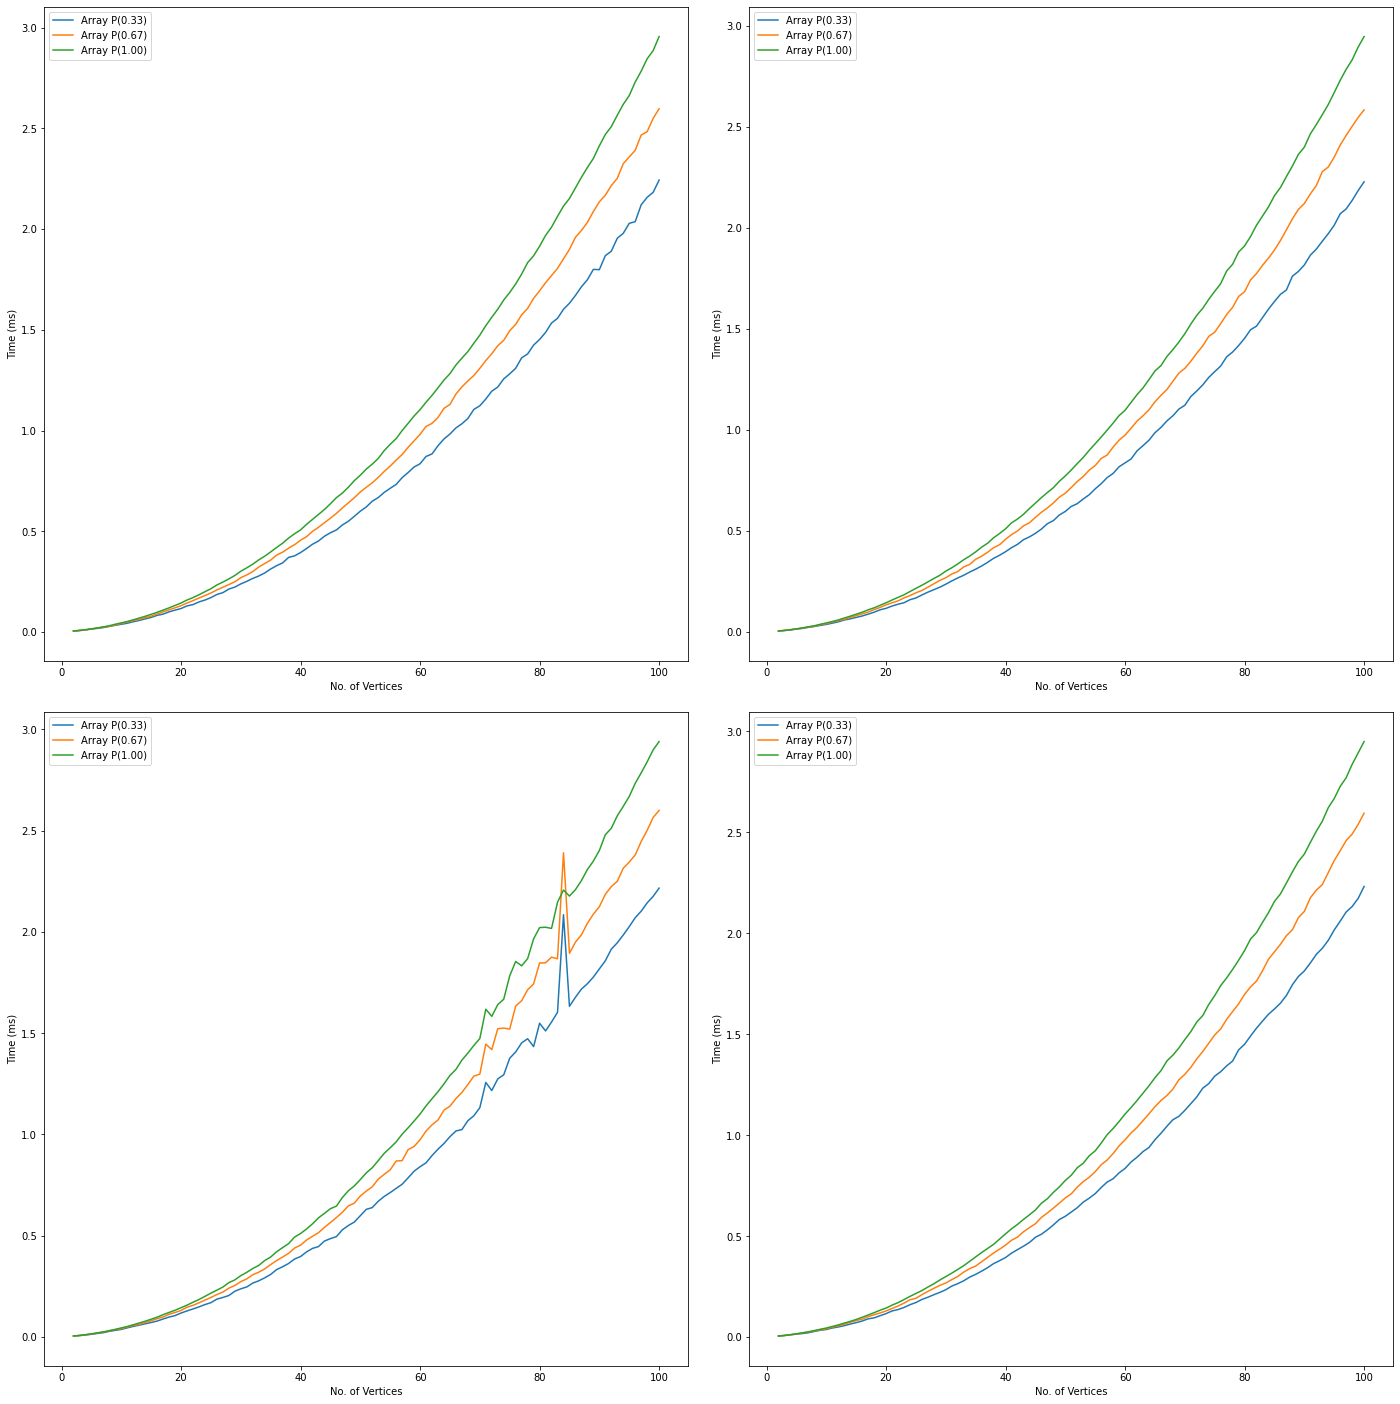

In [ ]:
generateTestResult("A", "VE", 100, 10, 0, 3, smooth = 100, sampleSize = 4)

# **(b)**

In [ ]:
def matrix_to_list(matrix):
  adj_list = {}
  n = len(matrix)

  for i in range(0,n):
    adj_list[i] = []
    for j in range(0,n):
      if matrix[i][j] != 0:
        adj_list[i].append((j, matrix[i][j]))

  return adj_list

In [ ]:
class minHeap():

  def __init__(self):
    #initialise heap items
    self.array = []
    self.position = []
  
  def swapHeapNode(self, a, b):
    #swap two nodes
    tmp = self.array[a]
    self.array[a] = self.array[b]
    self.array[b] = tmp

  def heapify(self, index):
    #start heapify at certain index
    small = index
    left = 2*index + 1
    right = 2*index + 2

    if left < len(self.array) and (self.array[left][1] < self.array[small][1]):
      small = left

    if right < len(self.array) and (self.array[right][1] < self.array[small][1]):
      small = right

    #swap index if not smallest weight
    if small != index:
      self.position[self.array[small][0]] = index
      self.position[self.array[index][0]] = small

      self.swapHeapNode(small, index)
      self.heapify(small)

  def takeMin(self):
    #take minimum node out from heap
    if len(self.array) == 0:
      return
    
    root = self.array[0]

    last = self.array[len(self.array)-1]
    self.array[0] = last

    self.position[last[0]] = 0
    self.position[root[0]] = len(self.array)-1

    self.array.pop(len(self.array)-1)
    self.heapify(0)

    return root

  def updateNode(self, vertex, weight):
    #change weight of node
    index = self.position[vertex]

    self.array[index][1] = weight

    while index > 0 and self.array[index][1] < self.array[(index-1)//2][1]:
      self.position[self.array[index][0]] = (index-1)//2
      self.position[self.array[(index-1)//2][0]] = index
      self.swapHeapNode(index, (index-1)//2)

      index = (index-1)//2
    

In [ ]:
def dijkstra_list_heap(graph, source=0):
  S = []
  d = []
  pi = []
  heap = minHeap()

  for i in range(len(graph)):
    d.append(float('inf'))
    pi.append(None)
    S.append(0)
    heap.array.append([i, d[i]])
    heap.position.append(i)

  d[source] = 0
  heap.updateNode(source, d[source])
  
  while len(heap.array) != 0:
    u = heap.takeMin()[0]
    S[u] = 1

    #print(heap.array)
    for edge in graph[u]:
      vertex = edge[0]

      if heap.position[vertex] < len(heap.array) and S[vertex] != 1 and d[vertex] > (edge[1] + d[u]):
        d[vertex] = edge[1] + d[u]
        pi[vertex] = u
        heap.updateNode(vertex, d[vertex])

  return pi
  #print(heap.array)
  #print("Graph\n", graph, "\n")
  #print("Found:\t\t", S)
  #print("Distance:\t", d)
  #print("Predecessor:\t", pi)

In [ ]:
#test = random_adjacency_matrix(10,0.5,10)
#print(test)
ConstructGraph(testData)

In [ ]:
convertedData = matrix_to_list(testData)
ConstructGraphFinal(dijkstra_list_heap(convertedData))

[None, 9, 5, 7, 0, 0, 0, 0, 6, 0]


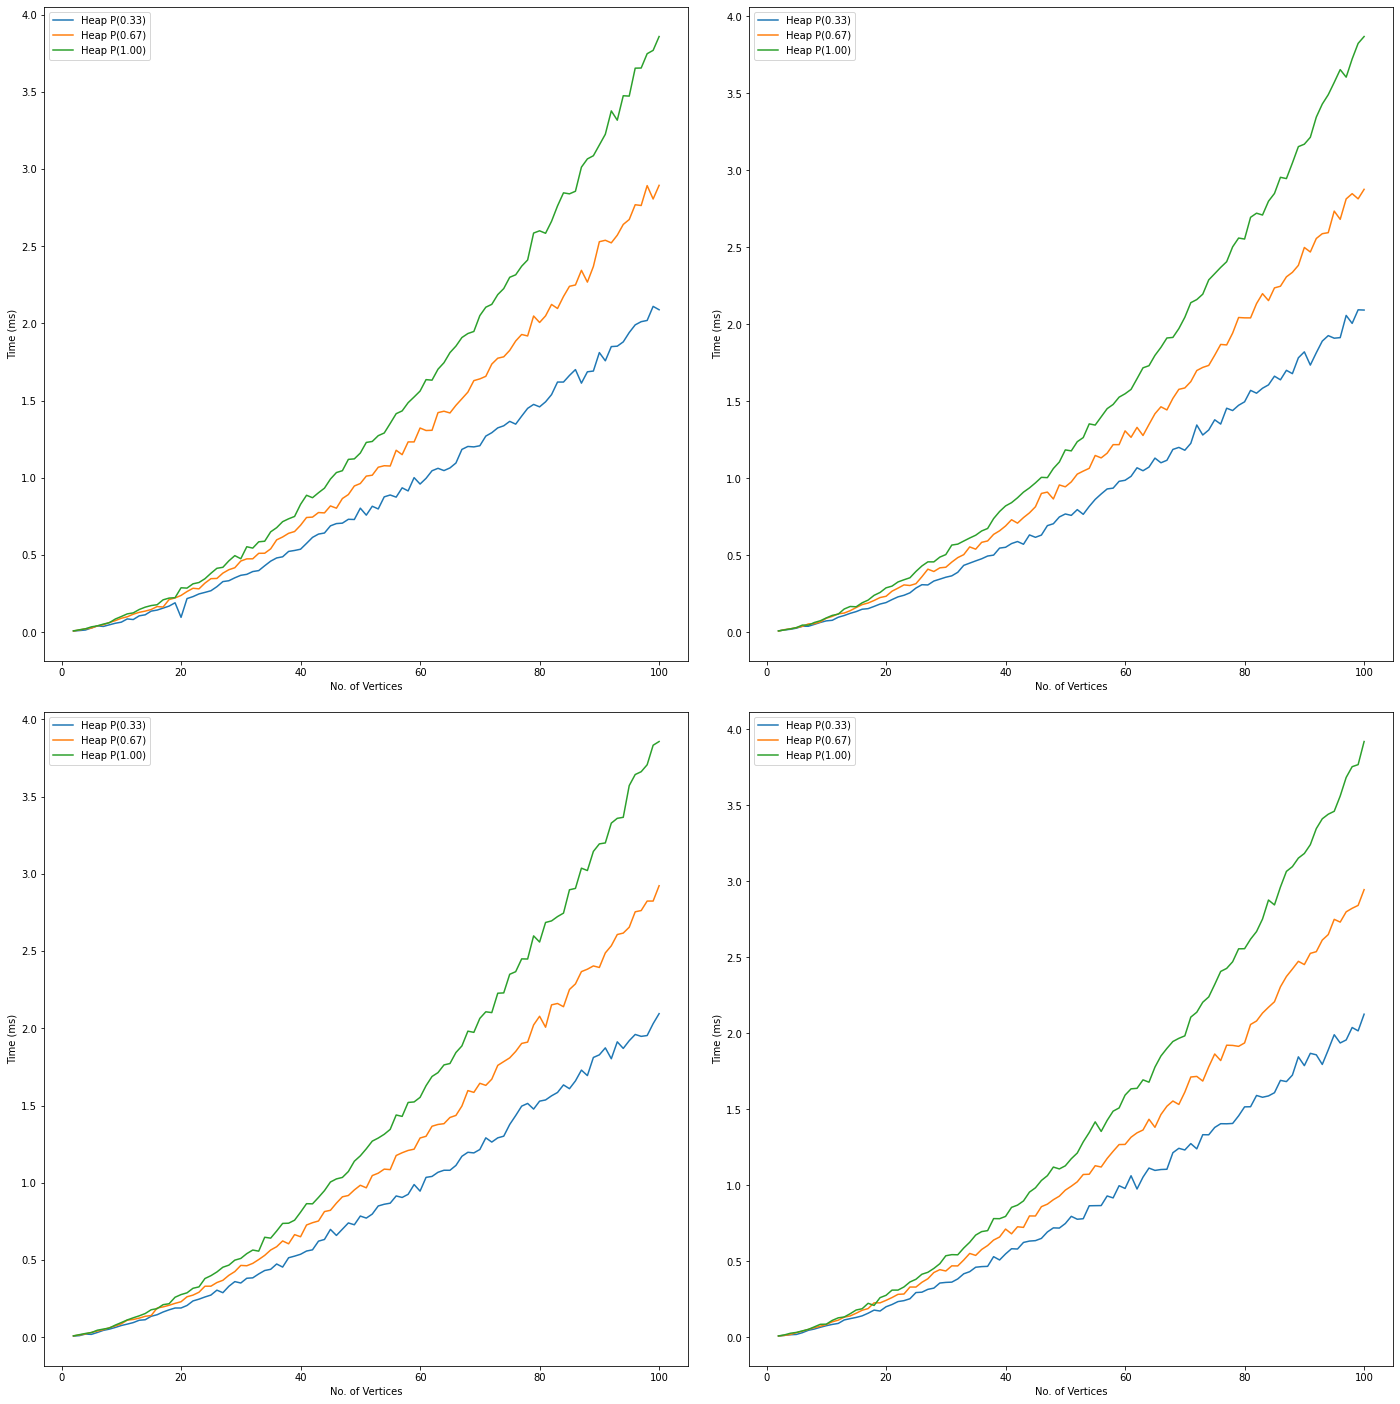

In [ ]:
generateTestResult("H", "VE", 100, 10, 0, 3, smooth = 100, sampleSize = 4)

## Time Complexity with respect to |V| and |E|

**Adjacency Matrix** using array as priority queue

Transversal using adjacency matrix

= V x number of edges each vertex is connected to

= V x (V-1)

= V^2 - V

= O(|V|^2)


Implementation of array for priority queue

= O(1)  ***insertion into array is constant time***


Therefore, overall time complexity

= O(|V|^2 + 1) 

= O(|V|^2)



---



**Adjacency Lists** using heap for priority queue

Transversal using adjacency list 

= O(|E|+|V|) 

Implementation of heap for priority queue

= O (log (|V|))

Overall time complexity 

= O(|E|+|V|) x O (log (|V|))

= O ((|E|+|V|) log |V|)

= O(|E| log|V|)

In [ ]:
def edge_count(graph):
  no_edge = 0
  if isinstance(graph, list):
    no_nodes = len(graph)
    for i in range(no_nodes):
      for j in range(no_nodes):
        if graph[i][j] > 0:
          no_edge += 1
  else:
    no_nodes = len(dictionary)
    for i in range(no_nodes):
      no_edge += len(graph[i])

  return no_edge

In [ ]:
def PointOfInterest(x1, x2, y1, y2):
  if ( (abs(x1 - x2)) <= 0.005 and (abs(y1 - y2)) <= 0.005):
    return True

In [ ]:
def CPUTimeDisplay(QueueType, Matrix, display):
    #print("Before: ", ListData)   
    test = 0

    data = Matrix
    if (QueueType == "H"):
      data = matrix_to_list(Matrix)
      
    #PROCESS TIME
    start = process_time()

    if (QueueType == "H"):
      test = dijkstra_list_heap(data)
    else:
      test = dijkstra_matrix_array(data)
     
    #STOP TIME
    stop = process_time()

    runtime = (stop - start) * 1000

    #print("After: ", ListData)
    
    if display:
      #Process Time (Computing time)
      print('CPU Runtime [ProcessTime]: ', runtime, " ms")
      print("Time Complexity: ", test)
    return runtime

def isMinimal(v1,v2):
  if (v1 < v2):
    return True

In [ ]:
#Generating Data
def generateTestResult(QueueType1, testType, Vertices, Weight, noIterations, ProbabilityE = 0, QueueType2 = "", sampleSize = 1, display = False , smooth = 10, gtype = "line", step = 1, figX = 0, figY = 0, Edges = False , intersectP = False):
  #Various Data generation Parameters
  Qtype = {'H': "Heap",
           'A': "Array"}

  xaxis = "No. of Vertices"
  
  yaxis = "Time (ms)"

  #SValues and start/end of loop
  indexS = 0
  indexE = noIterations
  if (testType == "VE" or testType == "HP"):
    indexS = 2
    indexE = Vertices + 1
    if (Edges == True):
      indexS = 1
      indexE = (Vertices * Vertices) - Vertices + 1
  #else: 


  #Initialising Array for storing Data
  sampleData = []
  dataToSample = []
  multiSample = []
  arraySizes = []
  xdata = []
  probUsed = []
  intersect = []

  sampleSort1RunTime = []
  sampleSort2RunTime = []
  samplesRunTime = []
  sampleSizes = []
  intersects = []

  titles = []

  minimalCPUTime1 = 0
  minimalCPUTime2 = 0
  minimalCPUTime3 = 0

  #Creating Samples based on sample size
  for k in range(sampleSize):

    if (testType == "HP"):
      title = "Probability of Edges Appearing: " + str(ProbabilityE)
      titles.append(title)

    #Testing data for key comparisons and computing time
    algoRunTime = []
    for i in range(indexS, indexE, step):
      
      #Comparing with respect V and E
      if (testType == "VE"):
        multiSample = []
        if (not Edges):
          
          for p in range(1, ProbabilityE + 1):
            probability = p * (1/ProbabilityE)
            if (len(probUsed) != ProbabilityE):
              probUsed.append(probability)
            dataToSample = random_adjacency_matrix(i, probability, Weight, 0)
            multiSample.append(dataToSample)
        else:
          dataToSample = random_adjacency_matrix(Vertices, 1, Weight, i)
          multiSample.append(dataToSample)
      if (testType == "HP"):
        probability = ProbabilityE
        if (Edges == False):
          dataToSample = random_adjacency_matrix(i, probability, Weight, 0)
        else:
          dataToSample = random_adjacency_matrix(Vertices, probability, Weight, i)

      #else:
       #dataToSample = random_adjacency_matrix(i, ProbabilityE, Weight, 0)

      #Minimising the anomaly present from CPU Execution by using the minimal time required for the process to complete after several runs
      minimalCPUTime = []
      
      for t in range(len(multiSample)):
        minimalCPUTime.append(0)
      
      for j in range(smooth):

        if (testType == "VE"):
          if (not Edges):
            for t in range(len(multiSample)):
              cpuTime = CPUTimeDisplay(QueueType1, multiSample[t], display)
              if (minimalCPUTime[t] == 0 or isMinimal(cpuTime, minimalCPUTime[t])):
                minimalCPUTime[t] = cpuTime
          else:
            cpuTime = CPUTimeDisplay(QueueType1, multiSample[0], display)
            if (minimalCPUTime[0] == 0 or isMinimal(cpuTime, minimalCPUTime[0])):
                minimalCPUTime[0] = cpuTime

        else:
          cpuTime1 = CPUTimeDisplay(QueueType1, dataToSample, display)
          cpuTime2 = CPUTimeDisplay(QueueType2, dataToSample, display)
          if (minimalCPUTime1 == 0 or isMinimal(cpuTime1, minimalCPUTime1) ):
            minimalCPUTime1 = cpuTime1
          if (minimalCPUTime2 == 0 or isMinimal(cpuTime2, minimalCPUTime2) ):
            minimalCPUTime2 = cpuTime2 
    
      if (testType == "VE"):
        for b in range(len(minimalCPUTime)):
          if (len(algoRunTime) != len(minimalCPUTime)):
            algoRunTime.append([])
          algoRunTime[b].append(minimalCPUTime[b])
      else:
        for b in range(2):
          if (len(algoRunTime) != 2):
            algoRunTime.append([])
        algoRunTime[0].append(minimalCPUTime1)
        algoRunTime[1].append(minimalCPUTime2)

        if (PointOfInterest(i,i, minimalCPUTime1, minimalCPUTime2)):
          point = []
          point.append(i)
          point.append((minimalCPUTime2 +minimalCPUTime1 )/ 2)
          intersect.append(point)

        minimalCPUTime1 = 0
        minimalCPUTime2 = 0

      
      
      
    #sort1RunTime.append(minimalCPUTime1)
    #sort2RunTime.append(minimalCPUTime2)
    #minimalCPUTime1 = 0
    #minimalCPUTime2 = 0   
      xdata.append(i)

    #Save Data
    #sampleSort1RunTime.append(sort1RunTime)
    #if (testType2 != ""):
      #sampleSort2RunTime.append(sort2RunTime)
    for o in range(len(algoRunTime)):
      samplesRunTime.append([])
      samplesRunTime[k].append(algoRunTime[o])
    intersects.append(intersect)
    sampleSizes.append(xdata)
    #Reset Array
    xdata = []
    intersect=[]
      
  #Setting parameters for generating Graph
  labelX = xaxis
  if (Edges):
    labelX = "No. of Edges"
  labelY = yaxis
  Qtype2 = ""
  if (QueueType2 != ""):
    Qtype2 =  Qtype[QueueType2]
  if (intersectP == False):
    intersects = []
    
  generateGraph(gtype, sampleSize, sampleSizes, samplesRunTime, Qtype[QueueType1], labelX, labelY,Qtype2, sampleSort2RunTime, pUsed = probUsed, figX = figX, figY = figY, intersectData = intersects, gTitle = titles )



In [ ]:
#Generating Visualisation of Data
def generateGraph(graphType, sampleSize, xData, yData, QueueType1, xGlabel, yGlabel, QueueType2 = "", yData2 = [], pUsed = [], gTitle = [], figX = 0, figY = 0, intersectData = []):
  maxY = 0
  sum = 0
  
  #For adjusting the ticks on the graph
  if (yData2 != []):
    if (max(max(yData1)) > max(max(yData2))):
      maxY = max(max(yData[0][0]))
    else:
      maxY = max(max(yData[0][1]))
  
  #for i in yData:
    #for j in i:
      #print(j , "\n")

  #Generating graph
  #Sample size 1
  if (sampleSize == 1):
    plt.figure(figsize=(15,10))
    if (figX != 0):
      plt.xticks(np.arange(0, max(max(xData))+1, figX))
    if (figY != 0):
      plt.yticks(np.arange(0, maxY, figY))

    if (graphType.lower() == "line"):
      for i in range(len(yData[0])):
        catStr = ""
        if (len(pUsed) > 0):
          catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[i]) + ")"
        else:
          if (i == 0):
            catStr = QueueType1
          else:
            catStr = QueueType2
        plt.plot(xData[0], yData[0][i], label= catStr)
      
      #plt.plot(xData[0], yData[0][1], label= QueueType1)

    else:
      for i in range(len(yData[0])):
        catStr = ""
        if (len(pUsed) > 0):
          catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[i]) + ")"
        else:
          if (i == 0):
            catStr = QueueType1
          else:
            catStr = QueueType2
        plt.scatter(xData[0], yData[0][i], label= catStr)

    if (gTitle):
      plt.title(gTitle[0])

    if (intersectData):
      plt.scatter(intersectData[0][len(intersectData[0]) - 1][0], intersectData[0][len(intersectData[0]) - 1][1], label= "Intersections", color='red') 

    plt.xlabel(xGlabel)
    plt.ylabel(yGlabel)
    #plt.ylim(bottom=0)
    plt.legend()

  # Sample size 2
  elif (sampleSize == 2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle('Horizontally stacked subplots')
    if (graphType.lower() == "line"):
      for i in range(len(yData[0])):
        catStr = ""
        if (len(pUsed) > 0):
          catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[i]) + ")"
        else:
          if (i == 0):
            catStr = QueueType1
          else:
            catStr = QueueType2
        ax1.plot(xData[0], yData[0][i], label= catStr)
        ax2.plot(xData[1], yData[1][i], label= catStr)
      
    else:
      for i in range(len(yData[0])):
        catStr = ""
        if (len(pUsed) > 0):
          catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[i]) + ")"
        else:
          if (i == 0):
            catStr = QueueType1
          else:
            catStr = QueueType2
        ax1.scatter(xData[0], yData[0][i], label= catStr)
        ax2.scatter(xData[1], yData[1][i], label= catStr)
    
    if (intersectData):
      ax1.scatter(intersectData[0][len(intersectData[0]) - 1][0], intersectData[0][len(intersectData[0]) - 1][1], label= "Intersections", color='red') 
      ax2.scatter(intersectData[1][len(intersectData[1]) - 1][0], intersectData[1][len(intersectData[1]) - 1][1], label= "Intersections", color='red') 

    if (gTitle):
        ax1.set_title(gTitle[0])
        ax2.set_title(gTitle[1])

    ax1.set(xlabel= xGlabel, ylabel= yGlabel)
    ax2.set(xlabel= xGlabel, ylabel= yGlabel)
    ax1.legend()
    ax2.legend()
  
  #Sample size more than 2
  else:
    fig, axs = plt.subplots(math.ceil(sampleSize/2), 2, figsize=(20,20)) 
    fig.tight_layout(pad=3.0)
    x = 0
    y = 0
    for i in range(sampleSize):
      if (graphType.lower() == "line"):
        for k in range(len(yData[i])):
          catStr = ""
          if (len(pUsed) > 0):
            catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[k]) + ")"
          else:
            if (k == 0):
              catStr = QueueType1
            else:
              catStr = QueueType2
          axs[x, y].plot(xData[i], yData[i][k], label= catStr)
        
      else:
        for k in range(len(yData[i])):
          catStr = ""
          if (len(pUsed) > 0):
            catStr = QueueType1 + " P(" + "{:.2f}".format(pUsed[k]) + ")"
          else:
            if (k == 0):
              catStr = QueueType1
            else:
              catStr = QueueType2
          axs[x, y].scatter(xData[i], yData[i][k], label= catStr)

      if (gTitle):
        axs[x, y].set_title(gTitle[i])
      if (intersectData):
        axs[x, y].scatter(intersectData[i][len(intersectData[i]) - 1][0], intersectData[i][len(intersectData[i]) - 1][1], label= "Intersections", color='red') 

      
      if (figX != 0):
        axs[x, y].xaxis.set_ticks(np.arange(0, max(max(xData))+1, figX))

      if (figY != 0):
        axs[x, y].xaxis.set_ticks(np.arange(0, maxY, figY))
      
      if ((i + 1) % 2 == 1):
        if (y == 1):
          y = 0
        else: 
          y += 1
      else:
        x += 1
        if (y == 1):
          y = 0

    for ax in axs.flat:
      ax.set(xlabel= xGlabel, ylabel= yGlabel)
      ax.legend()

  plt.show()

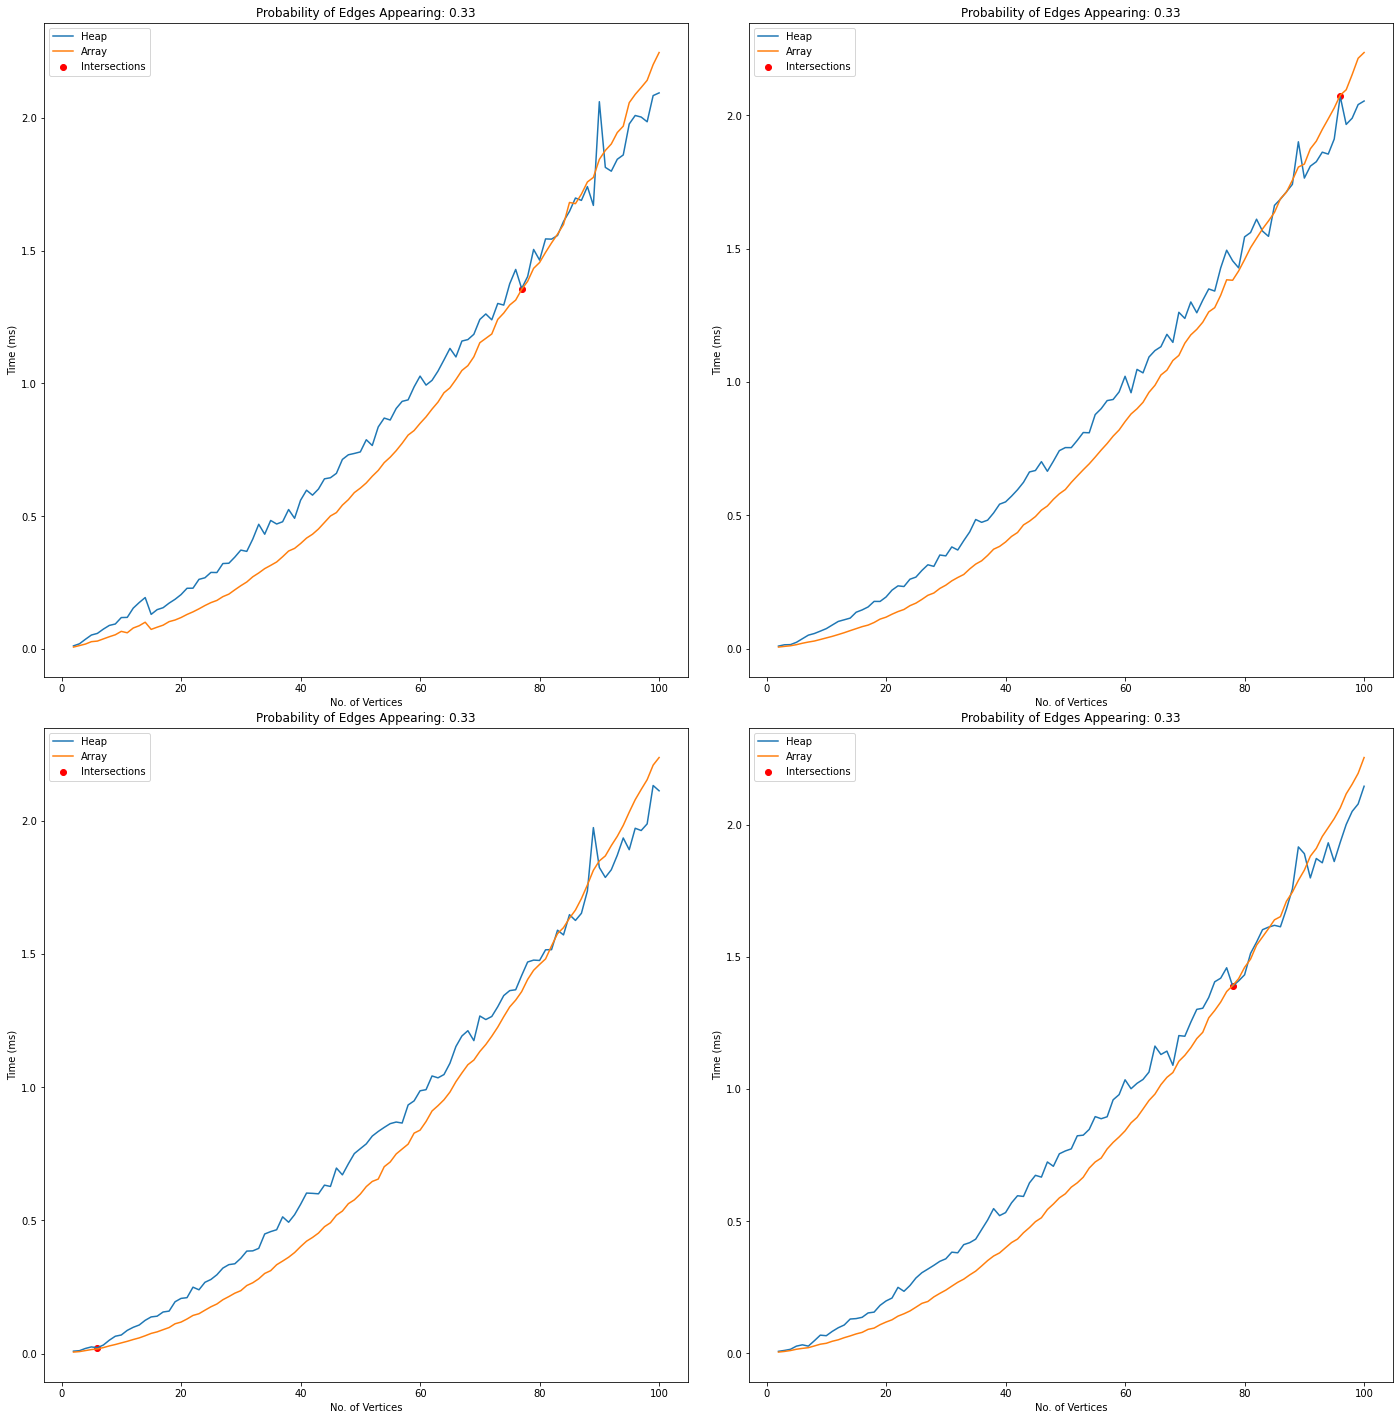

In [ ]:
generateTestResult("H", "HP", 100, 10, 0, 0.33, smooth = 10, QueueType2 = "A", sampleSize = 4, intersectP = True)

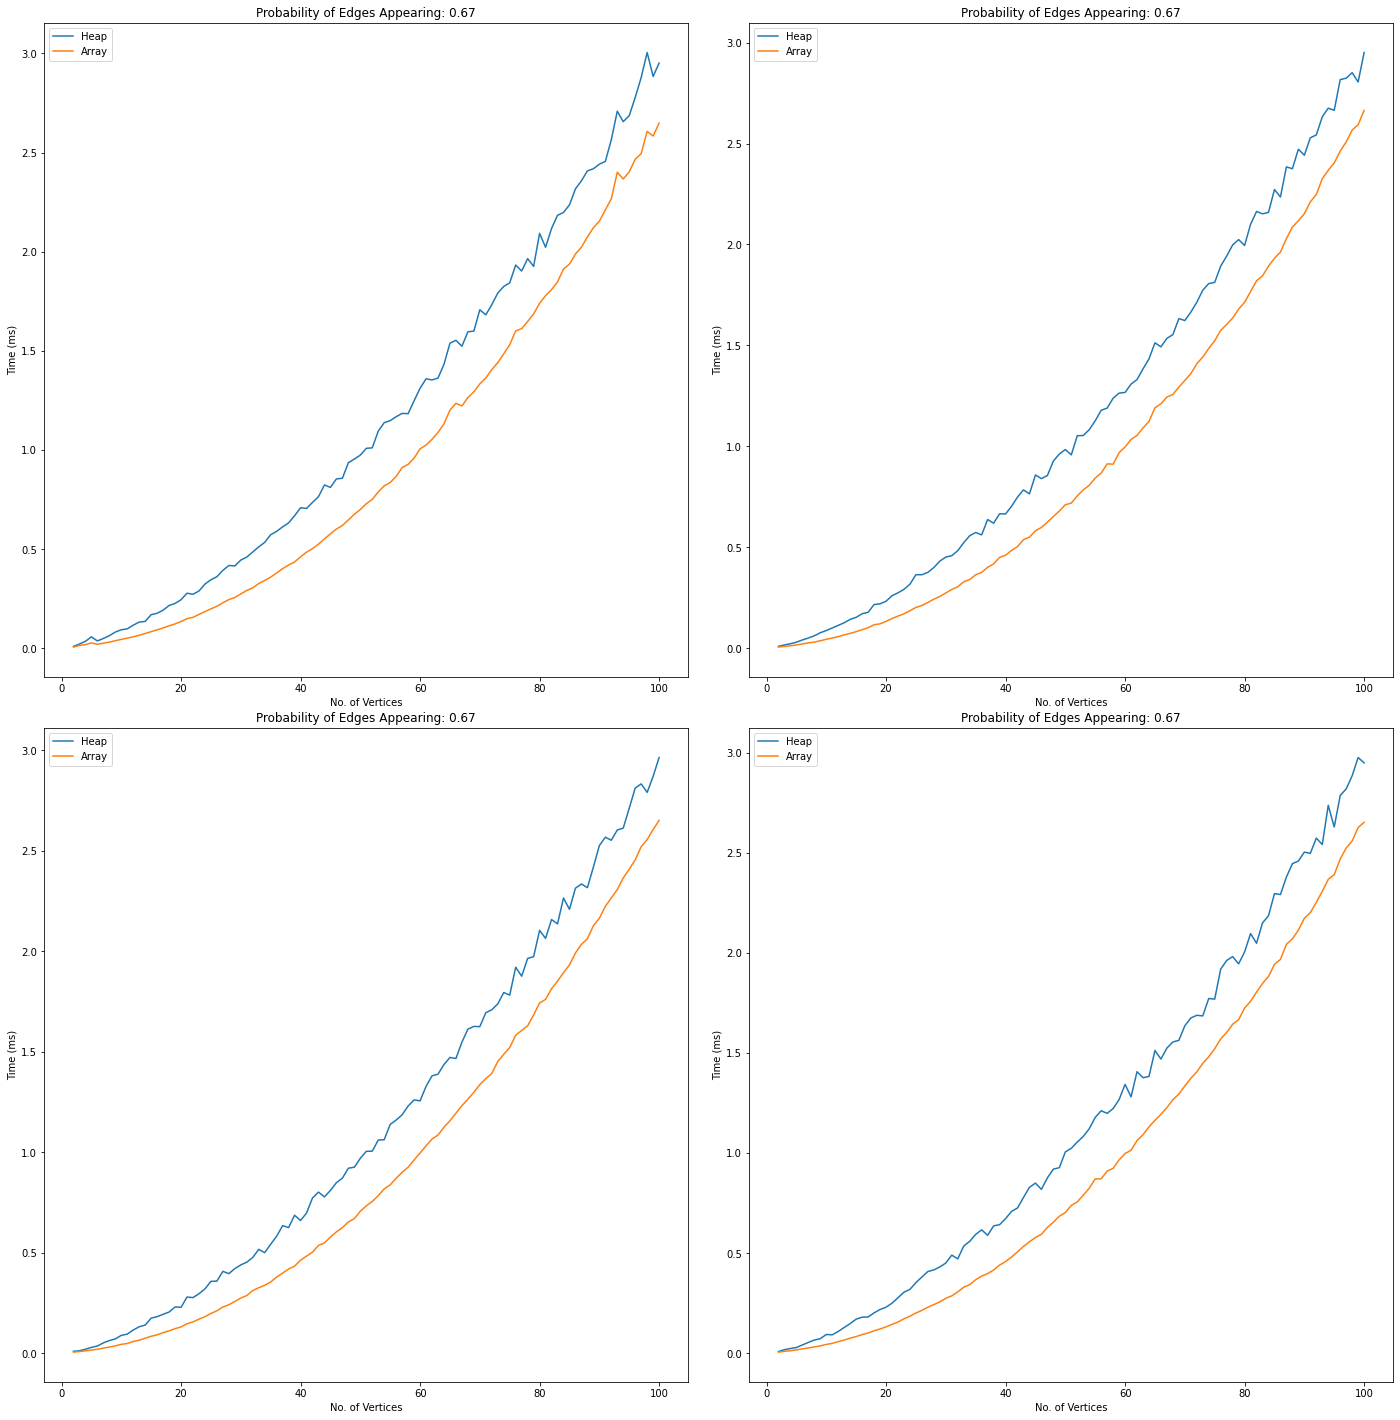

In [ ]:
generateTestResult("H", "HP", 100, 10, 0, 0.67, smooth = 10, QueueType2 = "A", sampleSize = 4, intersectP = False)

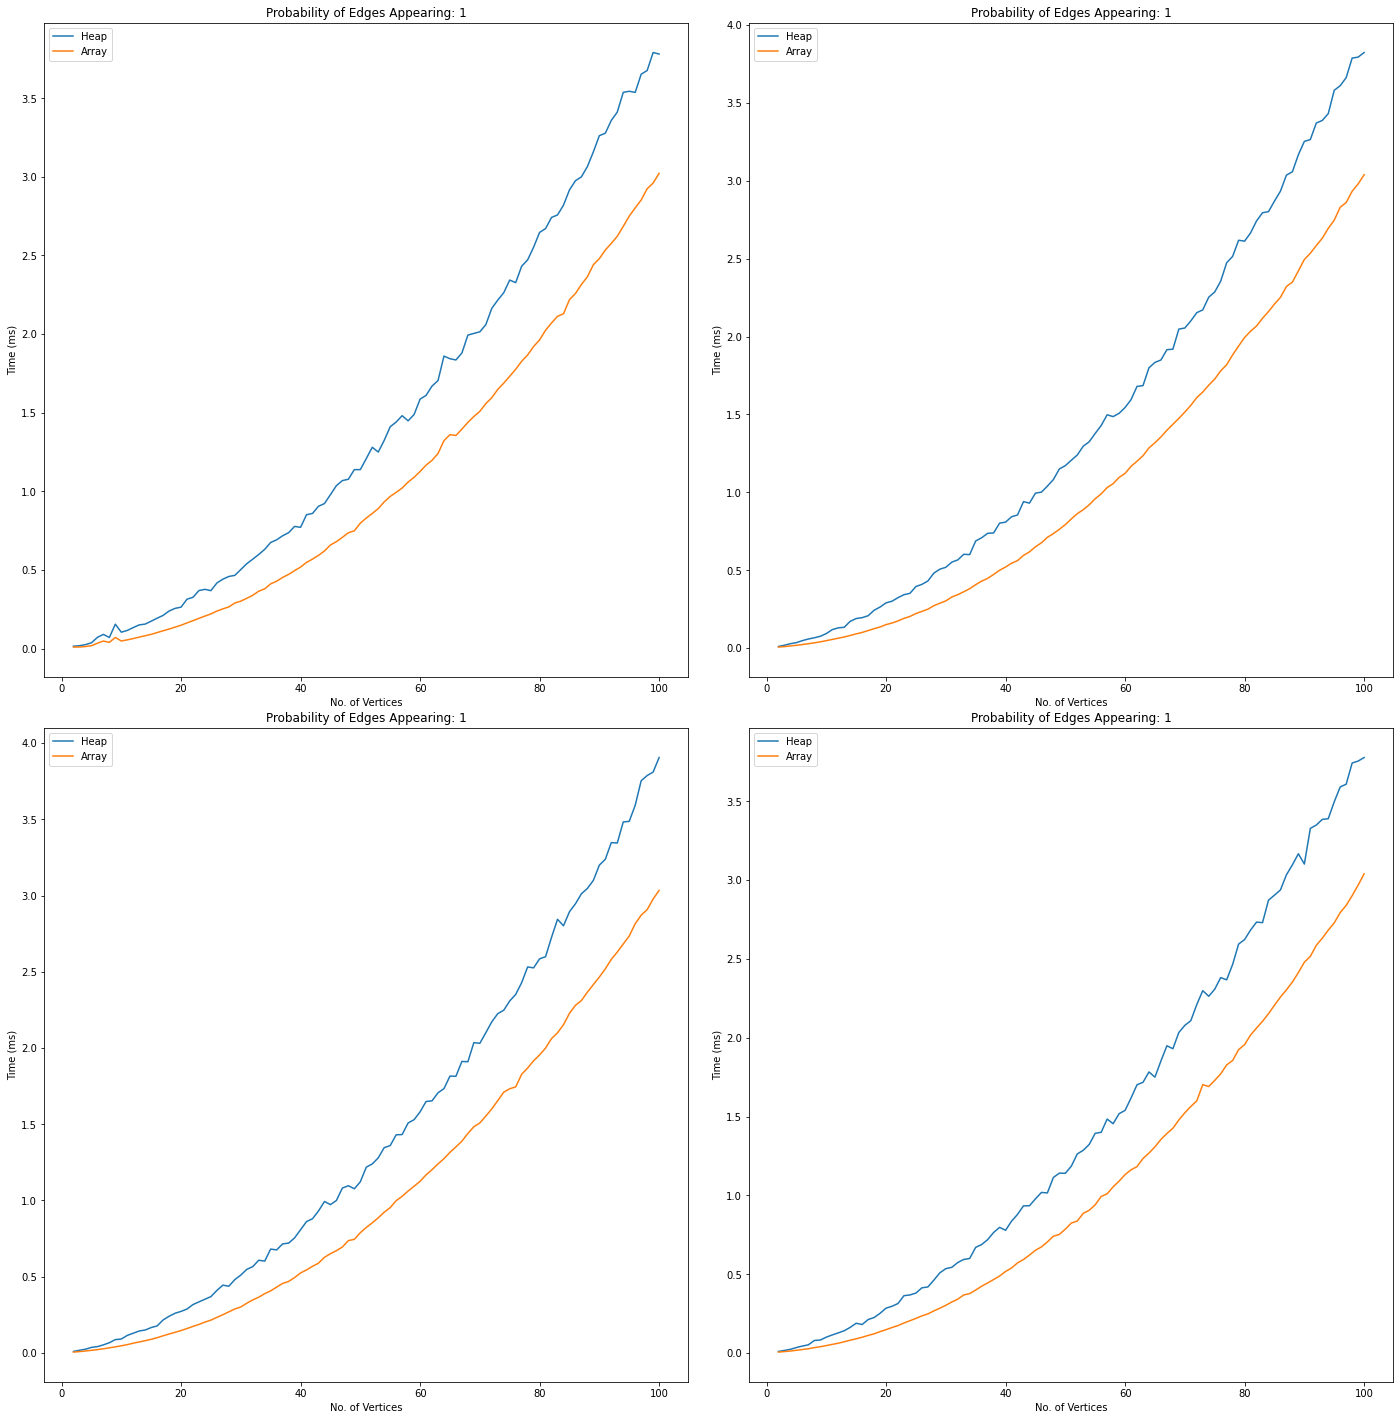

In [ ]:
generateTestResult("H", "HP", 100, 10, 0, 1, smooth = 10, QueueType2 = "A", sampleSize = 4, intersectP = False)

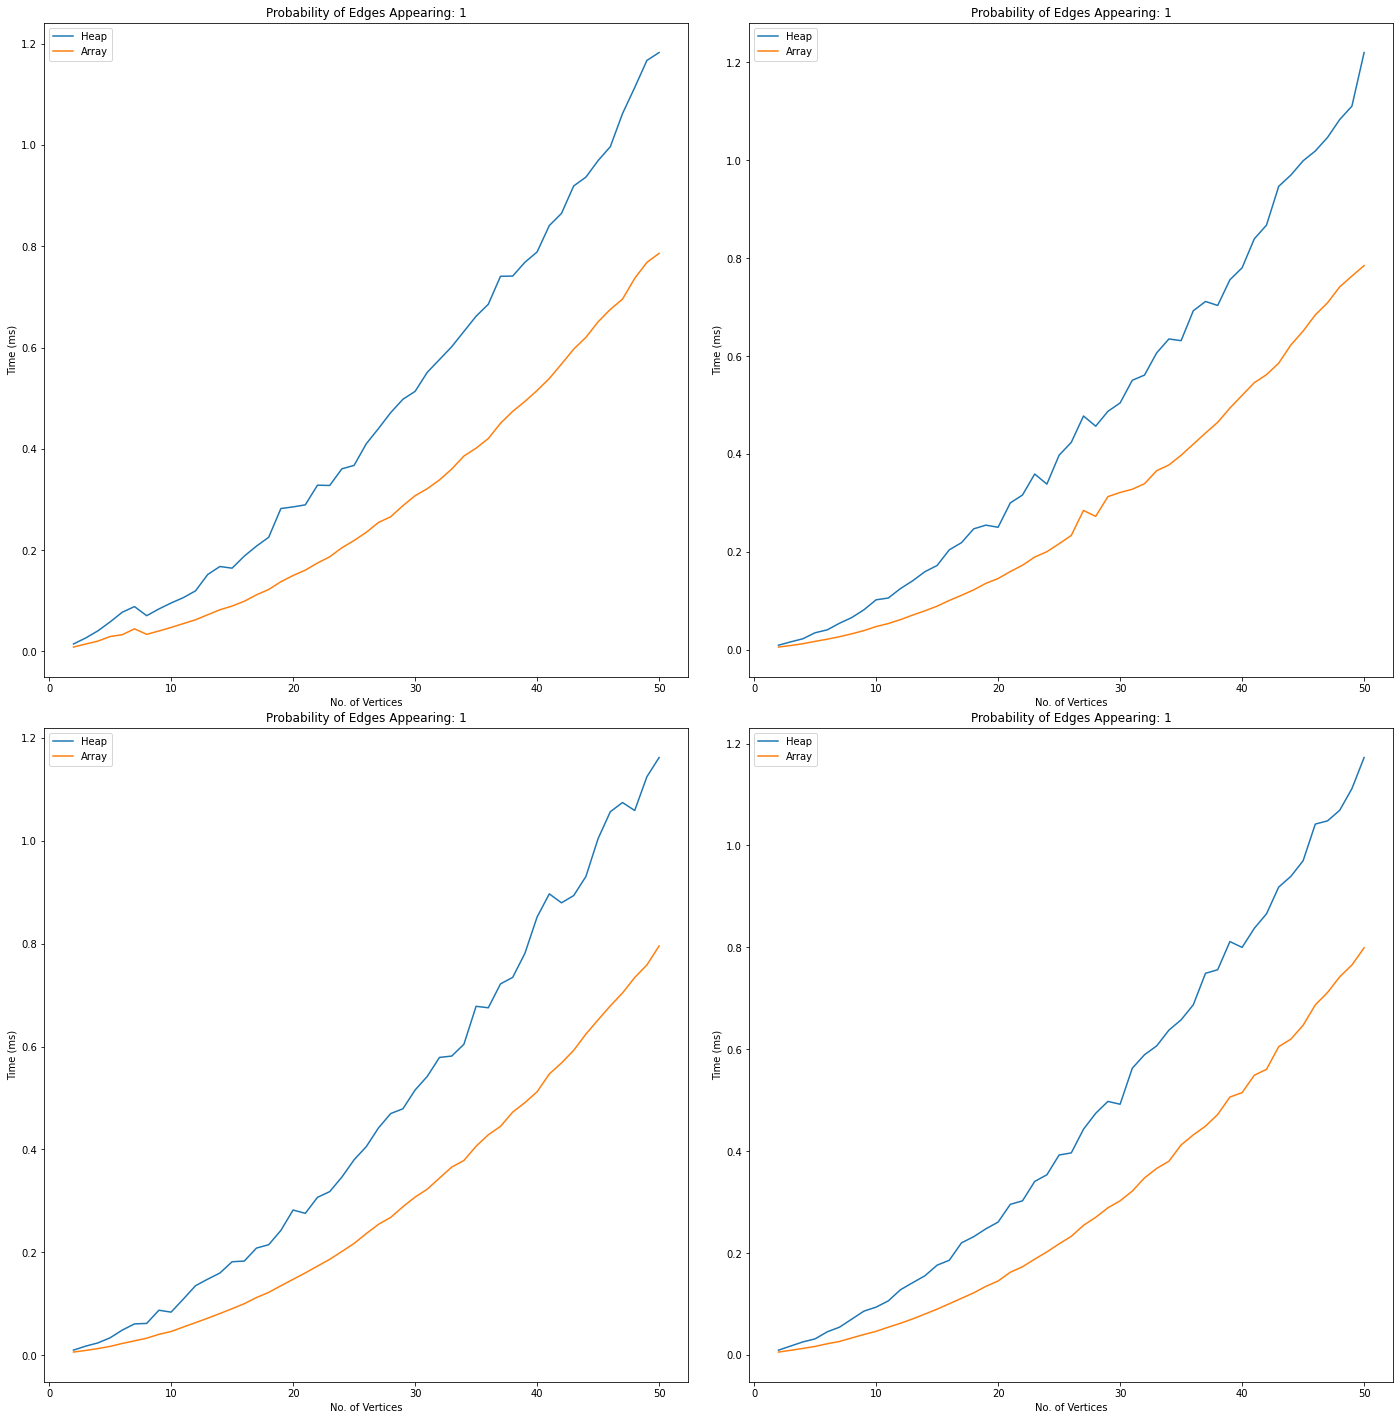

In [ ]:
generateTestResult("H", "HP", 50, 10, 0, 1, smooth = 10, QueueType2 = "A", sampleSize = 4, intersectP = False)

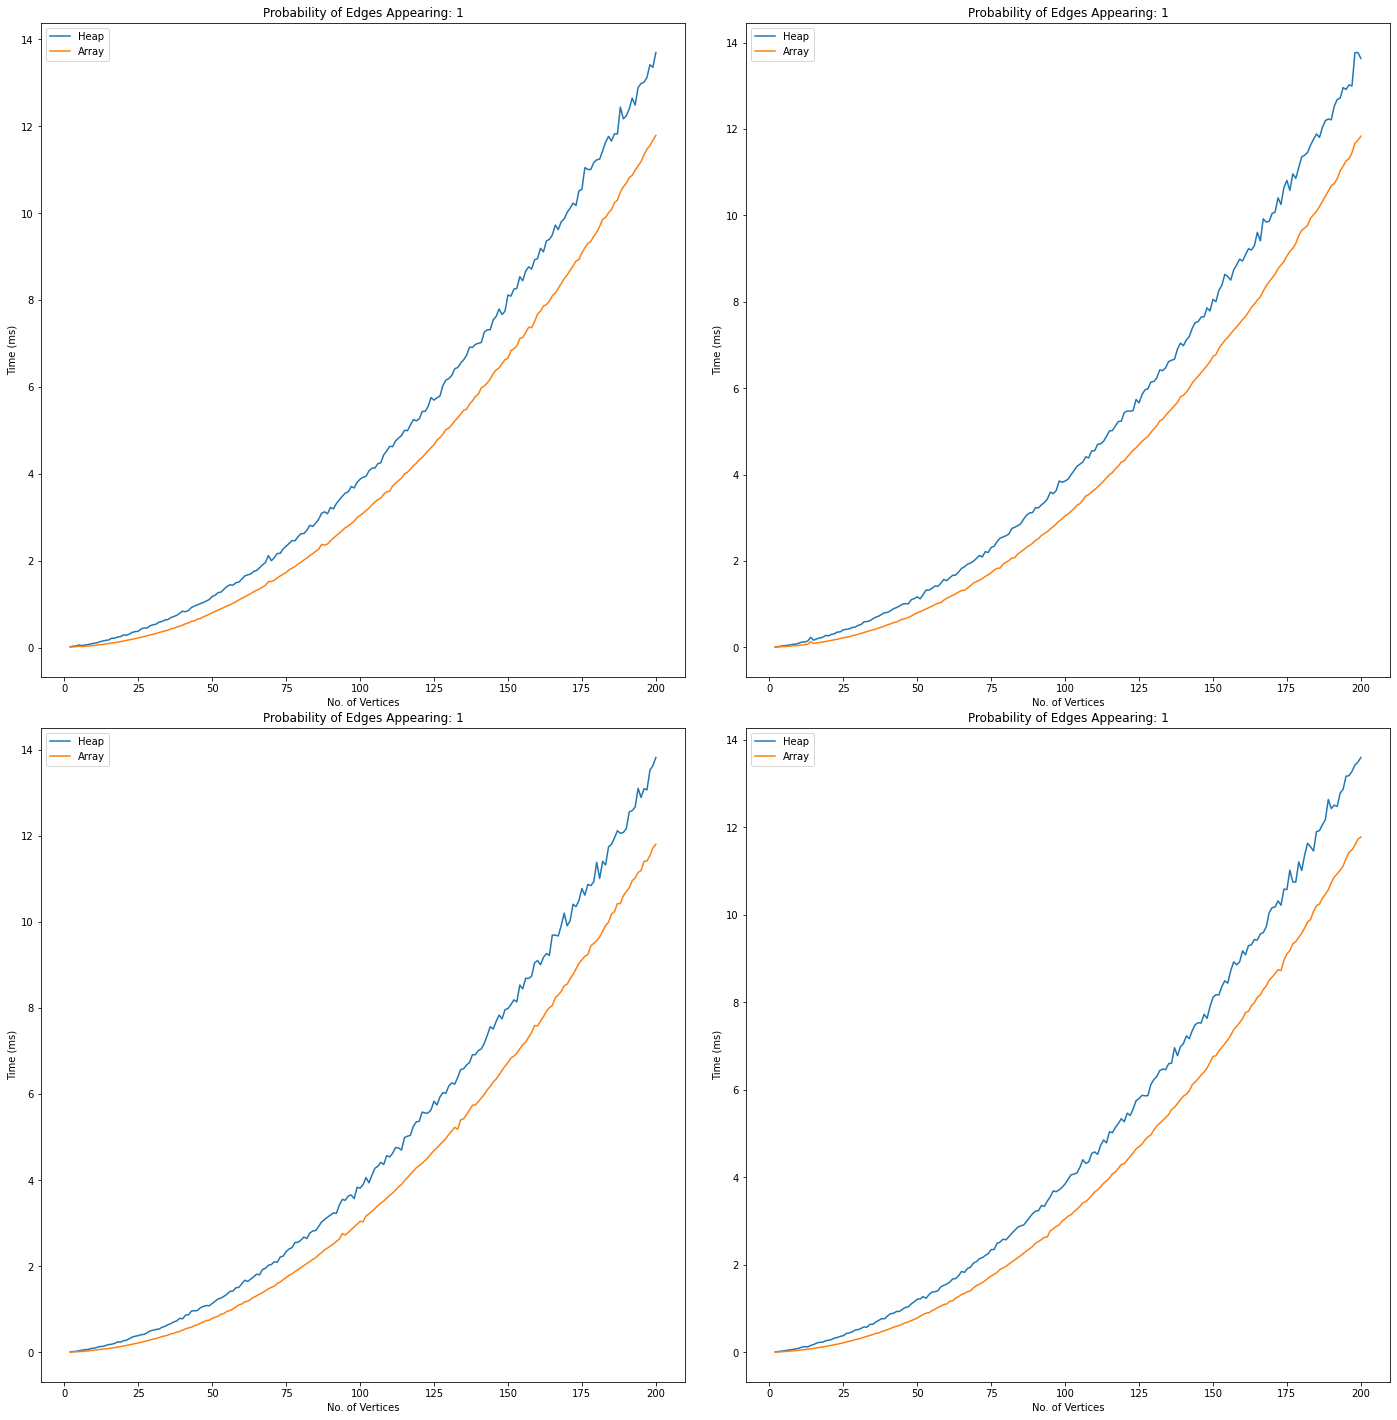

In [ ]:
generateTestResult("H", "HP", 200, 10, 0, 1, smooth = 10, QueueType2 = "A", sampleSize = 4, intersectP = False)

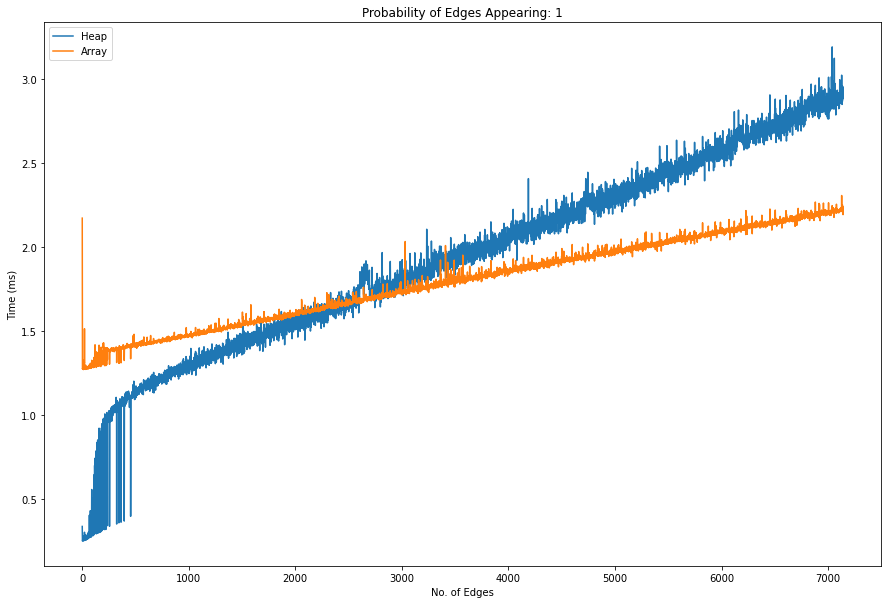

In [ ]:
generateTestResult("H", "HP", 85, 10, 0, 1, smooth = 5, QueueType2 = "A", Edges = True, )

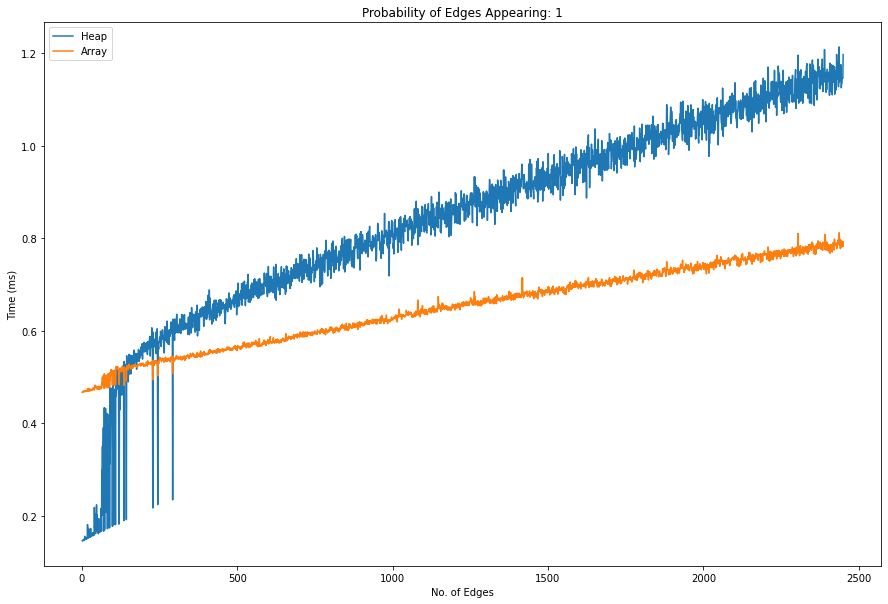

In [ ]:
generateTestResult("H", "HP", 50, 10, 0, 1, smooth = 10, QueueType2 = "A", Edges = True)

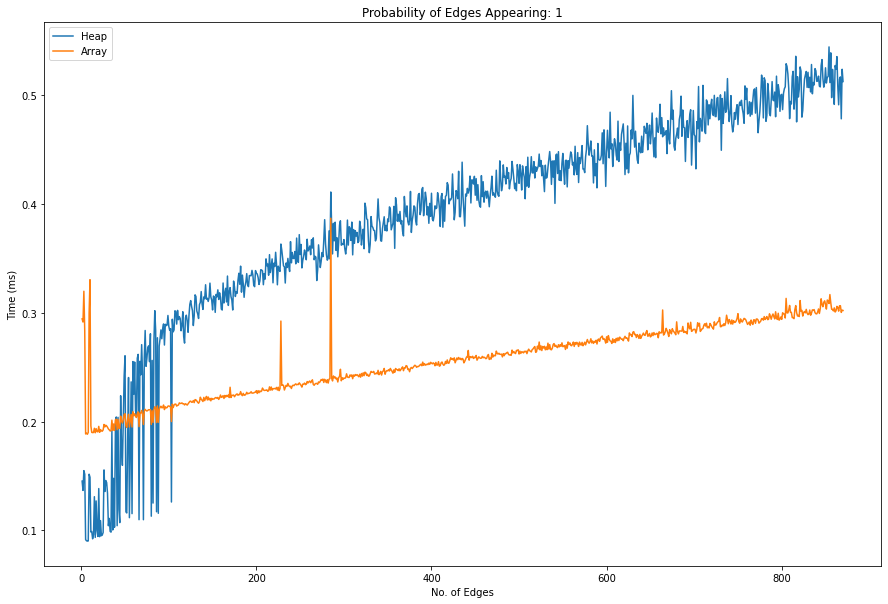

In [ ]:
generateTestResult("H", "HP", 30, 10, 0, 1, smooth = 10, QueueType2 = "A", Edges = True)

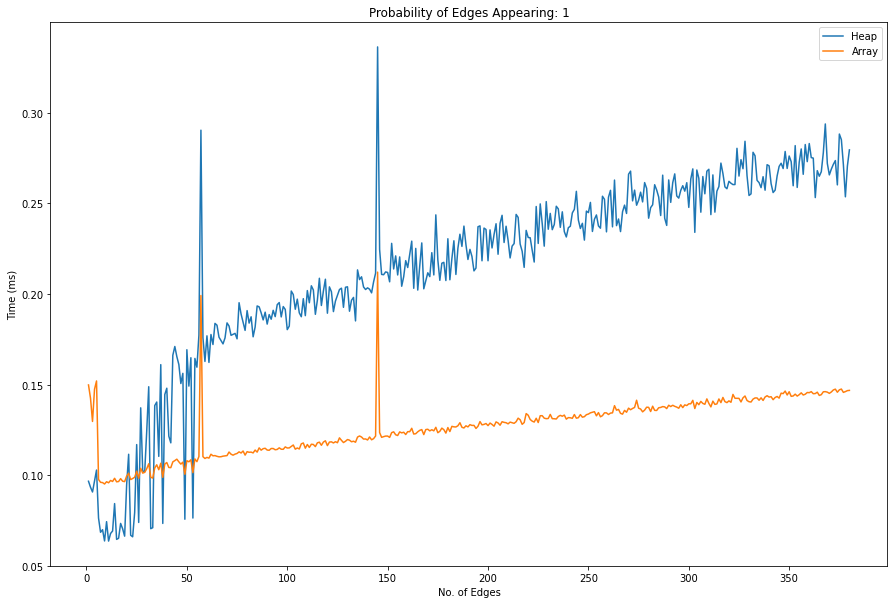

In [ ]:
generateTestResult("H", "HP", 20, 10, 0, 1, smooth = 10, QueueType2 = "A", Edges = True)

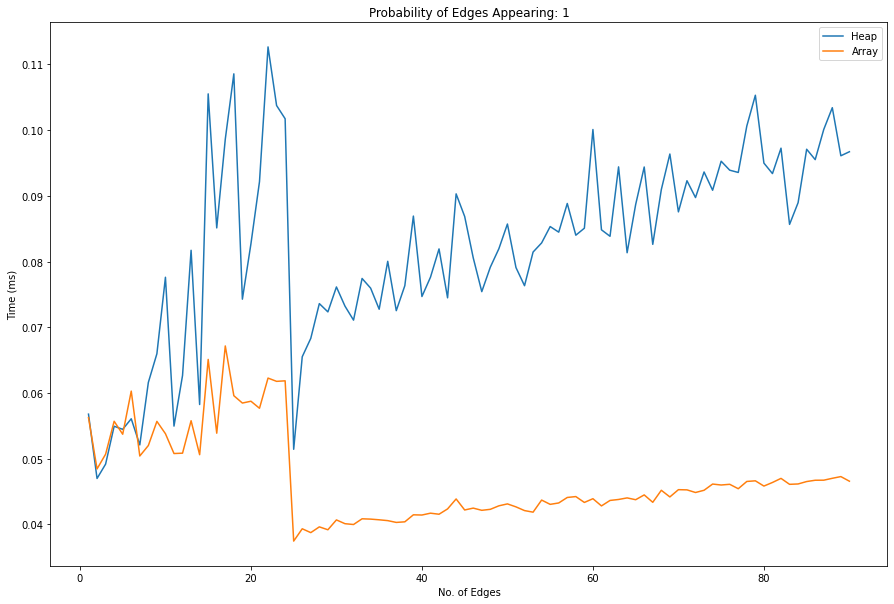

In [ ]:
generateTestResult("H", "HP", 10, 10, 0, 1, smooth = 10, QueueType2 = "A", Edges = True)

In [ ]:
test = random_adjacency_matrix(10, 1, 10, 0)
print(test, "\n")

CPUTimeDisplay("H", test, True)
CPUTimeDisplay("A", test, True)

[[0, 5, 10, 10, 1, 3, 10, 6, 9, 1], [7, 0, 10, 5, 6, 10, 5, 7, 4, 7], [6, 10, 0, 1, 1, 3, 5, 5, 10, 10], [6, 8, 10, 0, 5, 9, 6, 10, 4, 1], [10, 6, 8, 9, 0, 8, 3, 3, 6, 2], [4, 2, 1, 5, 7, 0, 5, 3, 3, 8], [1, 6, 4, 1, 3, 9, 0, 7, 4, 2], [6, 3, 4, 10, 10, 4, 3, 0, 7, 5], [8, 9, 3, 8, 5, 10, 4, 9, 0, 6], [8, 8, 3, 8, 3, 1, 8, 1, 7, 0]] 

CPU Runtime [ProcessTime]:  0.22675299987895414  ms
Time Complexity:  None
CPU Runtime [ProcessTime]:  0.14598899997508852  ms
Time Complexity:  269


0.14598899997508852

In [ ]:
!pip install pyvis
from pyvis.network import Network
from IPython.core.display import display, HTML
import networkx as nx

In [ ]:
def ConstructGraph(AdjMatrix):

  nxGraph = nx.DiGraph()
  net = Network(directed = True)

  for i in range (len(AdjMatrix)):
    net.add_node(i + 1)

  for i in range (len(AdjMatrix)):
    for j in range (len(AdjMatrix[i])):
      if (AdjMatrix[i][j] != 0):
        net.add_edge(source = i + 1, to = j + 1, title = AdjMatrix[i][j])
    
  
  net.show_buttons(filter_=["physics"])
  #net.from_nx(nxGraph)
  net.set_edge_smooth('dynamic')
  #net.toggle_physics(False)
  net.show("basic.html")
  #netgraph.draw(nxGraph, node_color='w', edge_color='k', edge_width=2.0)
  #plt.show()

  display(HTML("basic.html"))


In [ ]:
def ConstructGraphFinal(piQ):

  print(piQ)
  nxGraph = nx.DiGraph()
  net = Network(directed = True)

  for i in range (len(piQ)):
    net.add_node(i + 1, color = "red")

  for i in range (len(piQ)):
    if (piQ[i] != None):
      net.add_edge(source = i + 1, to = piQ[i] + 1, color = "red" )
    
  
  net.show_buttons(filter_=["physics"])
  #net.from_nx(nxGraph)
  net.set_edge_smooth('dynamic')
  #net.toggle_physics(False)
  net.show("basic2.html")
  #netgraph.draw(nxGraph, node_color='w', edge_color='k', edge_width=2.0)
  #plt.show()

  display(HTML("basic2.html"))


In [ ]:
test_matrix = [
[0, 1, 1, 1, 0],
[1, 0, 1, 1, 0],
[1, 1, 0, 1, 0],
[1, 1, 1, 0, 0],
[1, 1, 1, 1, 0]
]

dijkstra_matrix_array(test_matrix)
dijkstra_list_heap(matrix_to_list(test_matrix))

In [ ]:
test = [[0, 5, 0], [0, 0, 0], [0, 0, 0]]
#test = [[0, 5, 6], [4, 0, 3], [2, 1, 0]]
dijkstra_matrix_array(random_adjacency_matrix(10,0.5,10))

**Adjacency Matrix** using array as priority queue

Transversal using adjacency matrix

= O(|V|^2)

Implementation of array for priority queue

= O(|E| log (|V|))  *insertion into array is constant but sorting takes E log V


When graph is almost complete/fully complete, total number of edges, E = V(V-1)/2 ~ V^2

Therefore, overall time complexity

= O(|V|^2 + |E| log |V|) 

= O(|E| + |E| log |V|) 

= O(|E| log |V|)